######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#9bc335">Time Series: ARIMA and SARIMA
<font color=darkblue>
    
######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#3570c3">Import Libraries
<font color=darkblue>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
# for interactive visualizations
import plotly.offline as py
import plotly.figure_factory as ff
import statsmodels.tsa.api as smt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import (GradientBoostingRegressor,AdaBoostRegressor)
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split

import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea0ea1">Load dataset

In [3]:
traindat = pd.read_csv("/home/jayanthikishore/Downloads/ML_classwork/Week7_srrt/tseries_train.csv")
traindat.head()

date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10

In [4]:
dat = ff.create_table(traindat.head())
py.iplot(dat)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#3551c3">How many stores in the dataset

In [5]:
# check how many stores
traindat.store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#6735c3">Monthly Sales at each store

In [6]:
#Monthly Sales Sum
# %load monthly_sum.py
%run -i '~/Desktop/Analysis/Work/ML_EIT/Github/monthly_sum.py'
%run -i '~/Desktop/Analysis/Work/ML_EIT/Github/arange_supervised.py'
%run -i '~/Desktop/Analysis/Work/ML_EIT/Github/predict_df.py'

monthlysales = monthly_sum(traindat)
monthlysales.head()

date   sales
0 2013-01-31  454904
1 2013-02-28  459417
2 2013-03-31  617382
3 2013-04-30  682274
4 2013-05-31  763242

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#8a35c3">Yearly Sales at each store

In [7]:
#Yearly Sales Sum
%run -i '~/Desktop/Analysis/Work/ML_EIT/Github/yrly_sum.py'

yrlysales = yearly_sum(traindat)
yrlysales.head()

date     sales
0 2013-12-31   7941243
1 2014-12-31   9135482
2 2015-12-31   9536887
3 2016-12-31  10357160
4 2017-12-31  10733740

######  <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#a035c3">Exploratory Data Analysis (EDA)

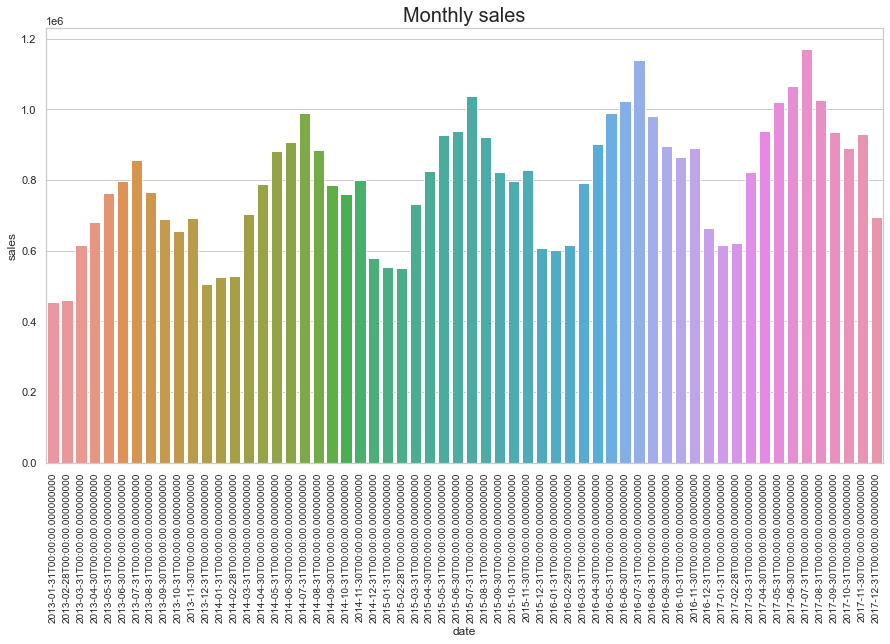

In [8]:
plt.rcParams['figure.figsize'] = (15, 8)

sns.set_theme(style="whitegrid")
sns.barplot(x="date", y="sales", data=monthlysales)
# sns.barplot(monthlysales['sales'], palette = 'hsv')
plt.title('Monthly sales', fontsize = 20)

# xx = monthlysales.index.values.astype('datetime64[D]')
xx = monthlysales['date']
yy = monthlysales['sales']
# ticks = np.arange(xx[0], xx[-1], (xx[-1] - xx[0]).astype('timedelta64[D]') / 20)
# plt.xticks(ticks, ticks)
plt.gca().tick_params('x', labelrotation=90, labelsize=10)
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#b035c3">Days and Years count

In [9]:
#finding the number of days, and no. of years of dataset
def duration(data):
    data.date = pd.to_datetime(data.date)
    num_days = data.date.max() - data.date.min()
    num_years = num_days.days / 365
    print("Number of days: ",num_days.days,"days")
    print("Number of years: ",num_years,'years')
    
duration(traindat)

Number of days:  1825 days
Number of years:  5.0 years


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#c335b0">Monthly sales

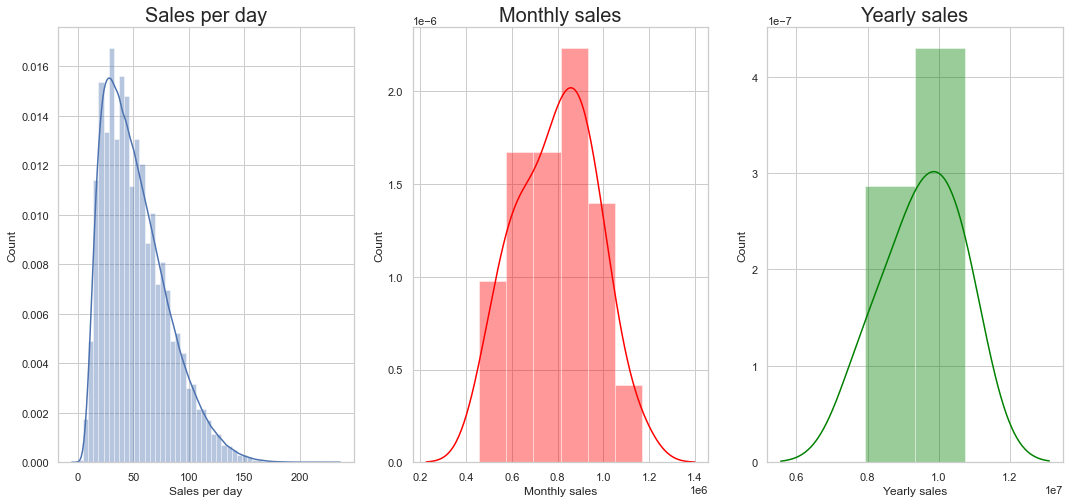

In [10]:
#sales for each day and monthly
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 3, 1)
sns.set(style = 'whitegrid')
sns.distplot(traindat['sales'])
plt.title('Sales per day', fontsize = 20)
plt.xlabel('Sales per day')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.set(style = 'whitegrid')
sns.distplot(monthlysales['sales'], color = 'red')
plt.title('Monthly sales', fontsize = 20)
plt.xlabel('Monthly sales')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.set(style = 'whitegrid')
sns.distplot(yrlysales['sales'], color = 'green')
plt.title('Yearly sales', fontsize = 20)
plt.xlabel('Yearly sales')
plt.ylabel('Count')
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#c33596">Each Store Sales

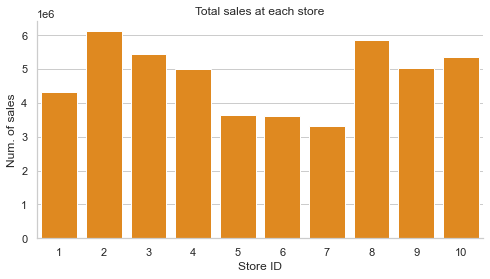

In [11]:
#sales per each store
def each_store_sales():
    ech_store = traindat.groupby('store')['sales'].sum().reset_index()
    
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set(style = 'whitegrid')
    sns.barplot(ech_store.store,ech_store.sales,color='darkorange')
    ax.set(xlabel="Store ID",ylabel='Num. of sales',title='Total sales at each store')
    
    sns.despine()
    
each_store_sales()

In [12]:
# Average monthly sales
# Overall sales
avg_monthly_sales = monthlysales.sales.mean()
print(f"Overall average monthly sales: ${avg_monthly_sales}")

#last 12 months average
avg_last12months = monthlysales.sales[-12:].mean()
print(f"Last 12 months average sales: ${avg_last12months}")

Overall average monthly sales: $795075.2
Last 12 months average sales: $894478.3333333334


######  <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#c33577">Stationary Calculations

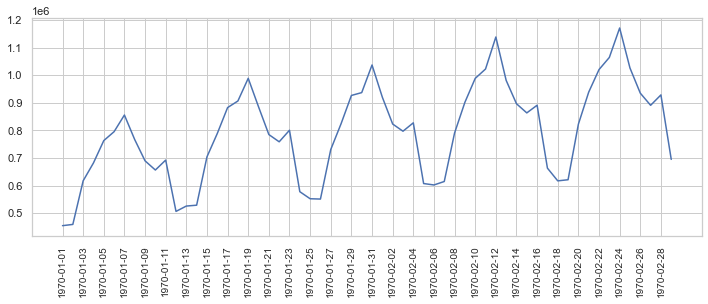

In [13]:
#monthly line plot
x = monthlysales.index.values.astype('datetime64[D]')
y = monthlysales['sales']
plt.figure(figsize=(12,4))
plt.plot(x, y)
ticks = np.arange(x[0], x[-1], (x[-1] - x[0]).astype('timedelta64[D]') / 20)
plt.xticks(ticks, ticks)
plt.gca().tick_params('x', labelrotation=90, labelsize=10)

Text(0.5, 1.0, 'Monthly Sales after differencing')

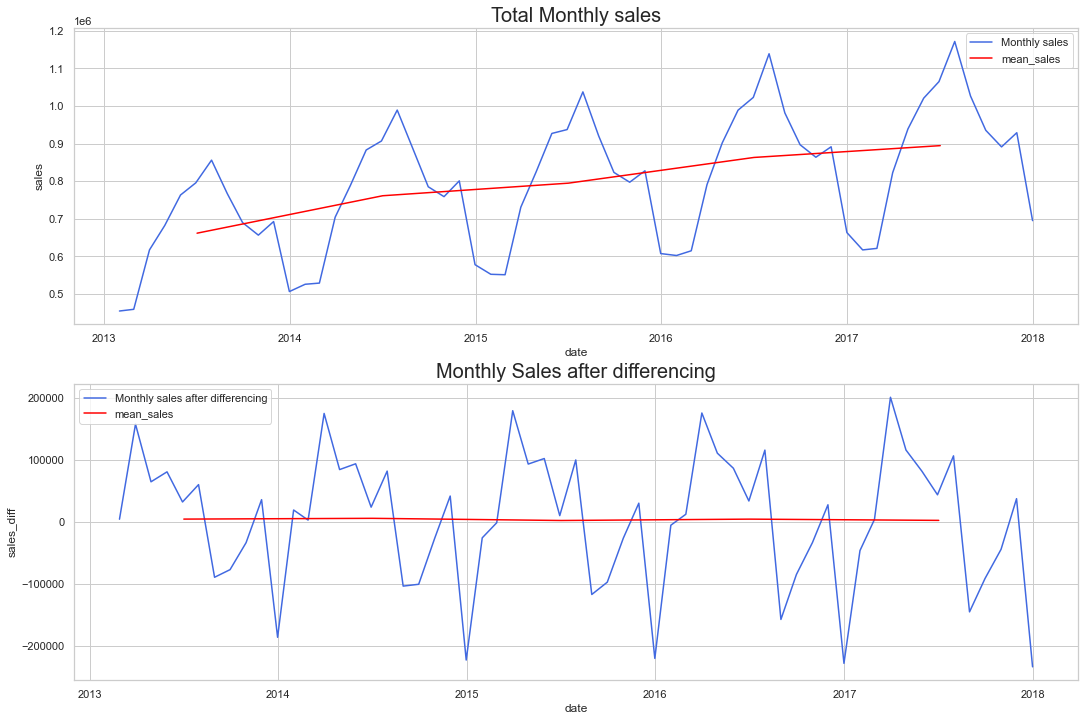

In [14]:
def diff_sales(data):
    data['sales_diff'] = data.sales.diff()
    data = data.dropna()
    
    data.to_csv("/home/jayanthikishore/Downloads/sales_statinary_diff.csv")
    return data

stationary_df = diff_sales(monthlysales)

#sales for each day and monthly
plt.rcParams['figure.figsize'] = (18, 12)

plt.subplot(2,1,1)
sns.lineplot('date','sales',data=monthlysales,color='royalblue',label='Monthly sales')
yrly_sales = monthlysales.groupby(monthlysales.date.dt.year)['sales'].mean().reset_index()
yrly_sales.date = pd.to_datetime(yrly_sales.date,format='%Y')
sns.lineplot((yrly_sales.date+datetime.timedelta(6*365/12)),yrly_sales.sales,data=yrly_sales,
            color='red',label="mean_sales")
plt.title('Total Monthly sales', fontsize = 20)


plt.subplot(2,1,2)
sns.lineplot('date','sales_diff',data=stationary_df,color='royalblue',label='Monthly sales after differencing')
yrly_sales = stationary_df.groupby(stationary_df.date.dt.year)['sales_diff'].mean().reset_index()
yrly_sales.date = pd.to_datetime(yrly_sales.date,format='%Y')
sns.lineplot((yrly_sales.date+datetime.timedelta(6*365/12)),yrly_sales.sales_diff,data=stationary_df,
            color='red',label="mean_sales")
plt.title('Monthly Sales after differencing', fontsize = 20)


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#c33577">Rolling mean and std

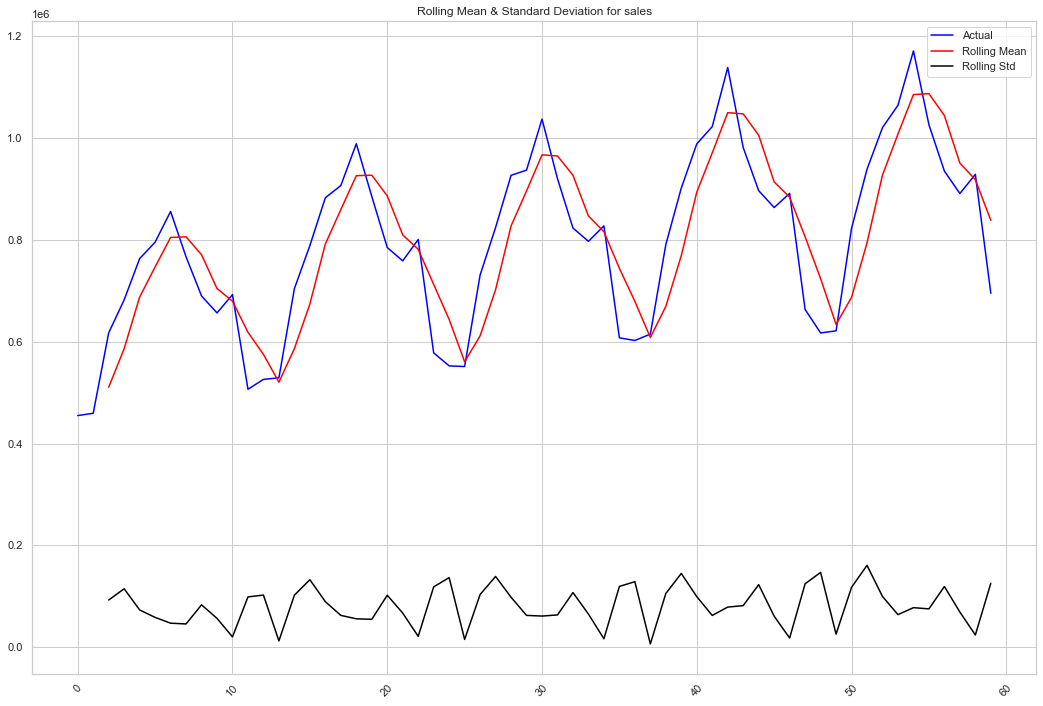

Results of Dickey-Fuller Test:
Test Statistic                 -5.247519
p-value                         0.000007
# Lags Used                    11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [15]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(df, ts):
    
    # Determing rolling statistics
    rolmean = df[ts].rolling(window = 3, center = False).mean()
    rolstd = df[ts].rolling(window = 3, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Actual')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
stationarity_check(monthlysales,"sales")

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#c33551">Auto Correlation Function (ACF) and Auto Correlation Function (PACF)

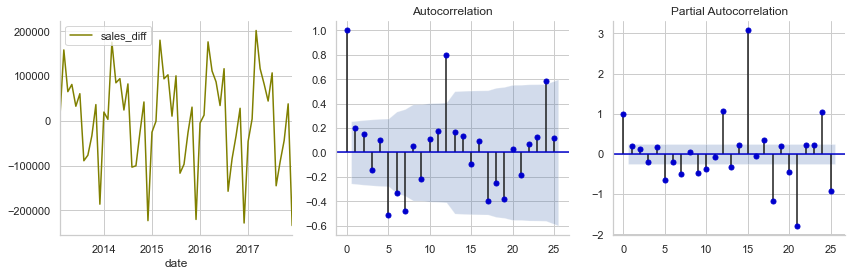

In [16]:
#Auto correlation function (ACF) and Partial auto correlation function (PACF)
def acf_pacf(data, lags=None):
    #convert dataframe to datetime index
    dt_data = data.set_index('date').drop('sales',axis=1)
    dt_data.dropna(axis=0)
    
    layout = (1,3)
    raw = plt.subplot2grid(layout, (0,0))
    acf = plt.subplot2grid(layout, (0,1))
    pacf = plt.subplot2grid(layout, (0,2))
    
    dt_data.plot(ax=raw, figsize=(12,4), color='olive')
    smt.graphics.plot_acf(dt_data, lags=lags, ax=acf, color='mediumblue')
    smt.graphics.plot_pacf(dt_data, lags=lags, ax=pacf, color="mediumblue")
    
    sns.despine()
    plt.tight_layout()
    
acf_pacf(stationary_df,lags=25)

In [17]:
model_df = arange_supervised(stationary_df)
model_df.head()

date   sales  sales_diff     lag_1     lag_2     lag_3     lag_4  \
0 2014-02-28  529117      3130.0   19380.0 -186036.0   36056.0  -33320.0   
1 2014-03-31  704301    175184.0    3130.0   19380.0 -186036.0   36056.0   
2 2014-04-30  788914     84613.0  175184.0    3130.0   19380.0 -186036.0   
3 2014-05-31  882877     93963.0   84613.0  175184.0    3130.0   19380.0   
4 2014-06-30  906842     23965.0   93963.0   84613.0  175184.0    3130.0   

      lag_5     lag_6    lag_7    lag_8    lag_9   lag_10    lag_11    lag_12  
0  -76854.0  -89161.0  60325.0  32355.0  80968.0  64892.0  157965.0    4513.0  
1  -33320.0  -76854.0 -89161.0  60325.0  32355.0  80968.0   64892.0  157965.0  
2   36056.0  -33320.0 -76854.0 -89161.0  60325.0  32355.0   80968.0   64892.0  
3 -186036.0   36056.0 -33320.0 -76854.0 -89161.0  60325.0   32355.0   80968.0  
4   19380.0 -186036.0  36056.0 -33320.0 -76854.0 -89161.0   60325.0   32355.0

######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c34a35">Auto Regressive Integrated Moving Avearge (ARIMA)

In [18]:
dt_dat = stationary_df.set_index('date')
dt_dat.dropna(axis=0)
dt_dat.head()

sales  sales_diff
date                          
2013-02-28  459417      4513.0
2013-03-31  617382    157965.0
2013-04-30  682274     64892.0
2013-05-31  763242     80968.0
2013-06-30  795597     32355.0

In [19]:
dt_dat.index = pd.to_datetime(dt_dat.index)
dt_dat.head()

sales  sales_diff
date                          
2013-02-28  459417      4513.0
2013-03-31  617382    157965.0
2013-04-30  682274     64892.0
2013-05-31  763242     80968.0
2013-06-30  795597     32355.0

######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c36e35">SARIMAX modeling

RMSE: 14959.835978461171
MAE: 11265.441970463036
MSE: 223796692.5024613
R2 Score: 0.9835644139413118


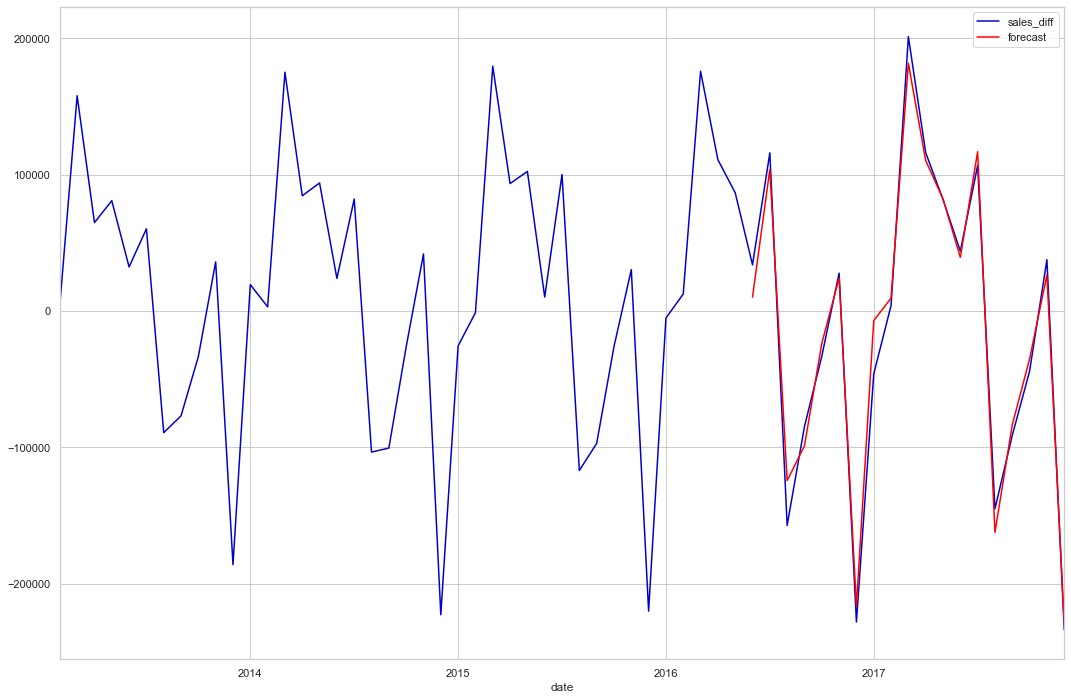

In [20]:
model_scores = {}
def get_scores(data):
    
    #model_scores = {}
    
    rmse = np.sqrt(mean_squared_error(data.sales_diff[-12:], data.forecast[-12:]))
    mae = mean_absolute_error(data.sales_diff[-12:], data.forecast[-12:])
    #calc. Mean Squared Error
    mse = mean_squared_error(data.sales_diff[-12:],data.forecast[-12:])
    r2 = r2_score(data.sales_diff[-12:], data.forecast[-12:])
    model_scores['ARIMA'] = [rmse, mae, mse, r2]
    
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    
    pickle.dump(model_scores, open( "/home/jayanthikishore/Downloads/arima_model_scores.pkl", "wb" ))
    
def sarimax_model(data):
    
    # Model
    sarmax = sm.tsa.statespace.SARIMAX(dt_dat.sales_diff, order=(12,0,0), seasonal_order=(0,1,0,12), trend='c').fit()

    # Predictions
    start, end, dynamic = 40, 100, 7
    data['forecast'] = sarmax.predict(start=start, end=end, dynamic=dynamic) 
    pred_df = data.forecast[start+dynamic:end]
    
    data[['sales_diff', 'forecast']].plot(color=['mediumblue', 'Red'])
    
    get_scores(data)

    return sarmax, data, pred_df

sarmax, dt_dat, predictions = sarimax_model(dt_dat)

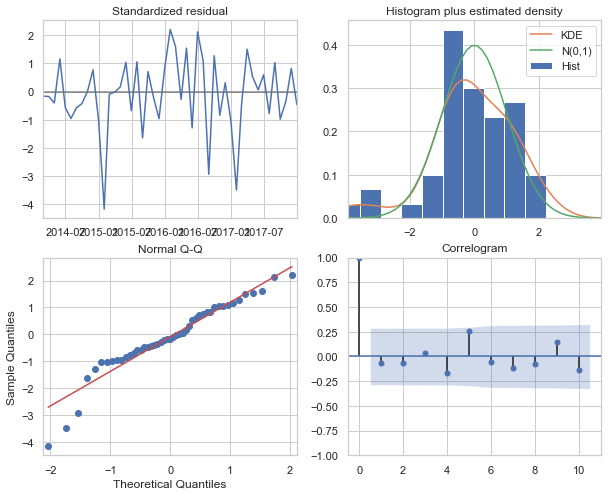

In [21]:
sarmax.plot_diagnostics(figsize=(10, 8));

In [22]:
def plot_results(results, original_df, model_name):

    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(original_df.date, original_df.sales, data=original_df, ax=ax, 
                label='Original', color='mediumblue')
    sns.lineplot(results.date, results.pred_value, data=results, ax=ax, 
                 label='Predicted', color='Red')
    
    ax.set(xlabel = "Date",
           ylabel = "Sales",
           title = f"{model_name} Sales Forecasting Prediction")
    
    ax.legend()
    
    sns.despine()
    

    plt.savefig(f'/home/jayanthikishore/Downloads/{model_name}_forecast.png')

In [23]:
original_df = pd.read_csv('/home/jayanthikishore/Downloads/ML_classwork/Week7_srrt/tseries_train.csv')
prediction_df, original_df = predict_df(predictions)
# plot_results(prediction_df, original_df, 'arima')

In [24]:
print(model_scores)

{'ARIMA': [14959.835978461171, 11265.441970463036, 223796692.5024613, 0.9835644139413118]}


In [25]:
#store the model results for each model data frame for final comparison
rmse1 = list({model_scores['ARIMA'][0]})
mae1 = list({model_scores['ARIMA'][1]})
mse1 = list({model_scores['ARIMA'][2]})
r21 = list({model_scores['ARIMA'][3]})
results_temp = pd.DataFrame({'Method':['ARIMA'],'RMSE':rmse1,
                            'MAE':mae1,'MSE':mse1,'MSE':mse1,
                            'R_square':r21},index={'1'})
# resultsapp = pd.concat([results,results_temp])
results = results_temp[['Method','RMSE','MAE','MSE','R_square']]

results

Method          RMSE          MAE           MSE  R_square
1  ARIMA  14959.835978  11265.44197  2.237967e+08  0.983564

######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c37a35">Models: Linear Reg (LReg), Random Forest (RF), XG Boost, and LSTM

In [26]:
#Loading the model fit values
mdl_df = pd.read_csv('~/Downloads/model_df.csv')

#Train and Split the datasets
data = mdl_df.drop(['sales','date'],axis=1)
train, test = data[0:-12].values,data[-12:].values
train.shape,test.shape

((35, 13), (12, 13))

In [27]:
def scale_data(train_set, test_set):
    #apply Min Max Scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train_set)
    
    # reshape training set
    train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
    train_set_scaled = scaler.transform(train_set)
    
    # reshape test set
    test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
    test_set_scaled = scaler.transform(test_set)
    
    X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1].ravel()
    X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1].ravel()
    
    return X_train, y_train, X_test, y_test, scaler

X_train, y_train, X_test, y_test, scaler_object = scale_data(train, test)

y_train.shape

(35,)

In [28]:
# Modeling functions
def undo_scaling(y_pred, x_test, scaler_obj, lstm=False):  
    #reshape y_pred
    y_pred = y_pred.reshape(y_pred.shape[0], 1, 1)
    
    if not lstm:
        x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
    
    #rebuild test set for inverse transform
    pred_test_set = []
    for index in range(0,len(y_pred)):
        pred_test_set.append(np.concatenate([y_pred[index],x_test[index]],axis=1))
        
    #reshape pred_test_set
    pred_test_set = np.array(pred_test_set)
    pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
    
    #inverse transform
    pred_test_set_inverted = scaler_obj.inverse_transform(pred_test_set)
    
    return pred_test_set_inverted

In [29]:
def load_original_df():
    #load in original dataframe without scaling applied
    original_df = pd.read_csv('/home/jayanthikishore/Downloads/ML_classwork/Week7_srrt/tseries_train.csv')
    original_df.date = original_df.date.apply(lambda x: str(x)[:-3])
    original_df = original_df.groupby('date')['sales'].sum().reset_index()
    original_df.date = pd.to_datetime(original_df.date)
    return original_df

In [30]:
def predict_df(unscaled_predictions, original_df):
    #create dataframe that shows the predicted sales
    result_list = []
    sales_dates = list(original_df[-13:].date)
    act_sales = list(original_df[-13:].sales)
    
    for index in range(0,len(unscaled_predictions)):
        result_dict = {}
        result_dict['pred_value'] = int(unscaled_predictions[index][0] + act_sales[index])
        result_dict['date'] = sales_dates[index+1]
        result_list.append(result_dict)
        
    df_result = pd.DataFrame(result_list)
    
    return df_result

In [31]:
model_scores = {}

def get_scores(unscaled_df, original_df, model_name):
    #calc. of Root Mean Squared Error
    rmse = np.sqrt(mean_squared_error(original_df.sales[-12:], unscaled_df.pred_value[-12:]))
    #calc. of Mean Absolute Error
    mae = mean_absolute_error(original_df.sales[-12:], unscaled_df.pred_value[-12:])
    #calc. Mean Squared Error
    mse = mean_squared_error(original_df.sales[-12:],unscaled_df.pred_value[-12:])
    #calc. of R2 value
    r2 = r2_score(original_df.sales[-12:], unscaled_df.pred_value[-12:])
    model_scores[model_name] = [rmse, mae, mse, r2]

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    

In [32]:
def plot_results(results, original_df, model_name):

    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(original_df.date, original_df.sales, data=original_df, ax=ax, 
                 label='Original', color='mediumblue')
    sns.lineplot(results.date, results.pred_value, data=results, ax=ax, 
                 label='Predicted', color='Red')
    
    ax.set(xlabel = "Date",
           ylabel = "Sales",
           title = f"{model_name} Sales Forecasting Prediction")
    
    ax.legend()
    
    sns.despine()
    
    plt.savefig(f'/home/jayanthikishore/Downloads/{model_name}_forecast.png')

In [33]:
def run_model(train_data, test_data, model, model_name):
    
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    mod = model
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)
    
    # Undo scaling to compare predictions against original data
    original_df = load_original_df()
    unscaled = undo_scaling(predictions, X_test, scaler_object)
    unscaled_df = predict_df(unscaled, original_df)
      
    get_scores(unscaled_df, original_df, model_name)
    
    plot_results(unscaled_df, original_df, model_name)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c38335">Linear Regression (LR)

RMSE: 16221.040790693221
MAE: 12433.0
MSE: 263122164.33333334
R2 Score: 0.9907155879704752


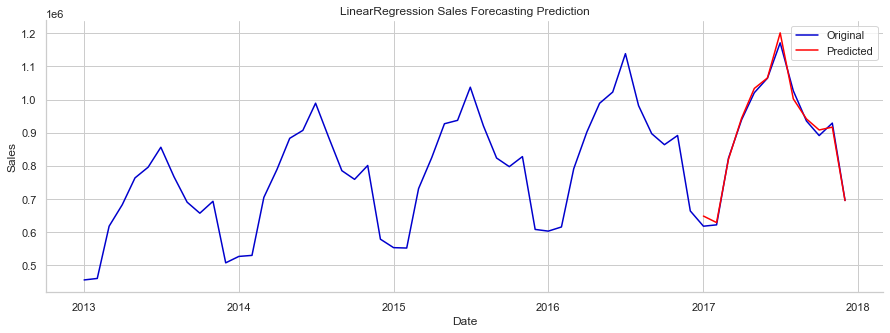

In [34]:
run_model(train, test, LinearRegression(), 'LinearRegression')

In [35]:
#store the model results for each model data frame for final comparison
rmse1 = list({model_scores['LinearRegression'][0]})
mae1 = list({model_scores['LinearRegression'][1]})
mse1 = list({model_scores['LinearRegression'][2]})
r21 = list({model_scores['LinearRegression'][3]})
results_temp = pd.DataFrame({'Method':['Linear Regression'],'RMSE':rmse1,
                            'MAE':mae1,'MSE':mse1,'MSE':mse1,
                            'R_square':r21},index={'2'})
results = pd.concat([results,results_temp])
results = results[['Method','RMSE','MAE','MSE','R_square']]

results

Method          RMSE          MAE           MSE  R_square
1              ARIMA  14959.835978  11265.44197  2.237967e+08  0.983564
2  Linear Regression  16221.040791  12433.00000  2.631222e+08  0.990716

######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c39635">Random Forest Regressor (RFR)

RMSE: 20443.5992652142
MAE: 17072.916666666668
MSE: 417940750.9166667
R2 Score: 0.985252727966605


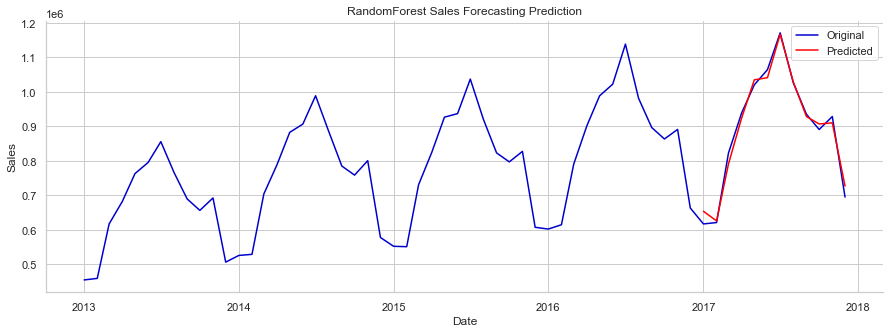

In [36]:
run_model(train, test, RandomForestRegressor(n_estimators=100, max_depth=20), 
          'RandomForest')

In [37]:
#store the model results for each model data frame for final comparison
rmse1 = list({model_scores['RandomForest'][0]})
mae1 = list({model_scores['RandomForest'][1]})
mse1 = list({model_scores['RandomForest'][2]})
r21 = list({model_scores['RandomForest'][3]})
results_temp = pd.DataFrame({'Method':['Random Forest'],'RMSE':rmse1,
                            'MAE':mae1,'MSE':mse1,'MSE':mse1,
                            'R_square':r21},index={'3'})
results = pd.concat([results,results_temp])
results = results[['Method','RMSE','MAE','MSE','R_square']]

results

Method          RMSE           MAE           MSE  R_square
1              ARIMA  14959.835978  11265.441970  2.237967e+08  0.983564
2  Linear Regression  16221.040791  12433.000000  2.631222e+08  0.990716
3      Random Forest  20443.599265  17072.916667  4.179408e+08  0.985253

######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c3a235">DecisionTree Regressor (DTR)

RMSE: 20459.483664876134
MAE: 17195.0
MSE: 418590471.8333333
R2 Score: 0.9852298022024079


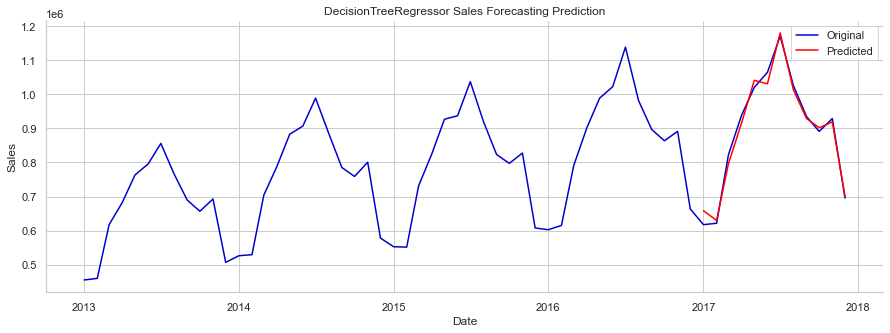

In [38]:
run_model(train, test, DecisionTreeRegressor(), 'DecisionTreeRegressor')

In [39]:
#store the model results for each model data frame for final comparison
rmse1 = list({model_scores['DecisionTreeRegressor'][0]})
mae1 = list({model_scores['DecisionTreeRegressor'][1]})
mse1 = list({model_scores['DecisionTreeRegressor'][2]})
r21 = list({model_scores['DecisionTreeRegressor'][3]})
results_temp = pd.DataFrame({'Method':['DecisionTreeRegressor'],'RMSE':rmse1,
                            'MAE':mae1,'MSE':mse1,'MSE':mse1,
                            'R_square':r21},index={'4'})
results = pd.concat([results,results_temp])
results = results[['Method','RMSE','MAE','MSE','R_square']]

results

Method          RMSE           MAE           MSE  R_square
1                  ARIMA  14959.835978  11265.441970  2.237967e+08  0.983564
2      Linear Regression  16221.040791  12433.000000  2.631222e+08  0.990716
3          Random Forest  20443.599265  17072.916667  4.179408e+08  0.985253
4  DecisionTreeRegressor  20459.483665  17195.000000  4.185905e+08  0.985230

######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c3be35">Gradient Boost Regressor (GBR)

RMSE: 13798.242382033059
MAE: 11655.333333333334
MSE: 190391492.83333334
R2 Score: 0.993281930198242


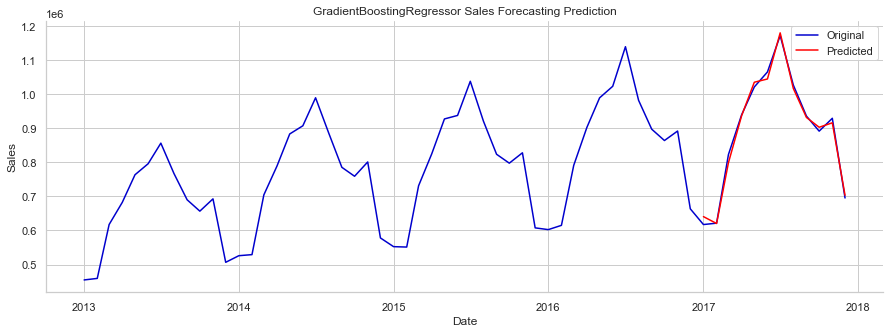

In [40]:
run_model(train, test, GradientBoostingRegressor(), 'GradientBoostingRegressor')

In [41]:
#store the model results for each model data frame for final comparison
rmse1 = list({model_scores['GradientBoostingRegressor'][0]})
mae1 = list({model_scores['GradientBoostingRegressor'][1]})
mse1 = list({model_scores['GradientBoostingRegressor'][2]})
r21 = list({model_scores['GradientBoostingRegressor'][3]})
results_temp = pd.DataFrame({'Method':['GradientBoostingRegressor'],'RMSE':rmse1,
                            'MAE':mae1,'MSE':mse1,'MSE':mse1,
                            'R_square':r21},index={'5'})
results = pd.concat([results,results_temp])
results = results[['Method','RMSE','MAE','MSE','R_square']]

results

Method          RMSE           MAE           MSE  \
1                      ARIMA  14959.835978  11265.441970  2.237967e+08   
2          Linear Regression  16221.040791  12433.000000  2.631222e+08   
3              Random Forest  20443.599265  17072.916667  4.179408e+08   
4      DecisionTreeRegressor  20459.483665  17195.000000  4.185905e+08   
5  GradientBoostingRegressor  13798.242382  11655.333333  1.903915e+08   

   R_square  
1  0.983564  
2  0.990716  
3  0.985253  
4  0.985230  
5  0.993282

######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#b5c335">Ada Boost Regressor (ABR)

RMSE: 16290.581312525344
MAE: 14259.833333333334
MSE: 265383039.5
R2 Score: 0.9906358117317541


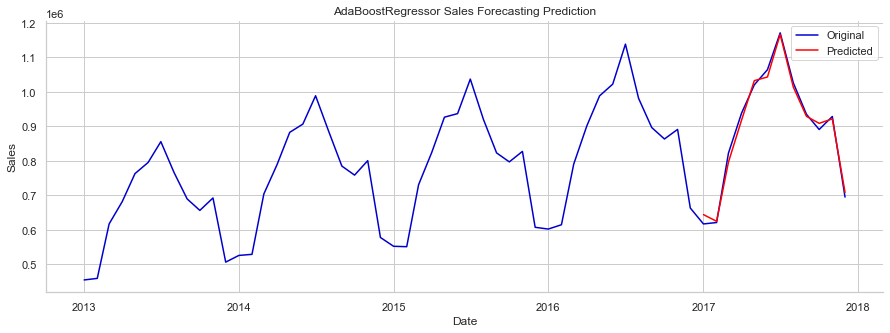

In [42]:
run_model(train, test, AdaBoostRegressor(), 'AdaBoostRegressor')

In [43]:
#store the model results for each model data frame for final comparison
rmse1 = list({model_scores['AdaBoostRegressor'][0]})
mae1 = list({model_scores['AdaBoostRegressor'][1]})
mse1 = list({model_scores['AdaBoostRegressor'][2]})
r21 = list({model_scores['AdaBoostRegressor'][3]})
results_temp = pd.DataFrame({'Method':['AdaBoostRegressor'],'RMSE':rmse1,
                            'MAE':mae1,'MSE':mse1,'MSE':mse1,
                            'R_square':r21},index={'6'})
results = pd.concat([results,results_temp])
results = results[['Method','RMSE','MAE','MSE','R_square']]

results

Method          RMSE           MAE           MSE  \
1                      ARIMA  14959.835978  11265.441970  2.237967e+08   
2          Linear Regression  16221.040791  12433.000000  2.631222e+08   
3              Random Forest  20443.599265  17072.916667  4.179408e+08   
4      DecisionTreeRegressor  20459.483665  17195.000000  4.185905e+08   
5  GradientBoostingRegressor  13798.242382  11655.333333  1.903915e+08   
6          AdaBoostRegressor  16290.581313  14259.833333  2.653830e+08   

   R_square  
1  0.983564  
2  0.990716  
3  0.985253  
4  0.985230  
5  0.993282  
6  0.990636

######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#a0c335">XG Boost Regressor XGBR)

RMSE: 15701.003359658262
MAE: 13342.666666666666
MSE: 246521506.5
R2 Score: 0.9913013514225064


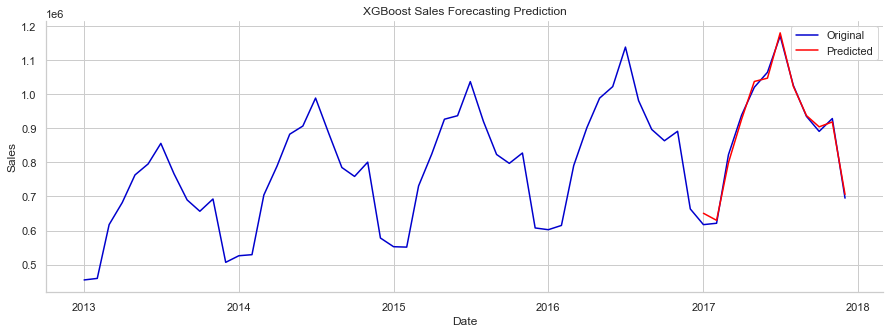

In [44]:
run_model(train, test, XGBRegressor( n_estimators=100, 
                                    learning_rate=0.2, 
                                    objective='reg:squarederror'), 'XGBoost')

In [45]:
#store the model results for each model data frame for final comparison
rmse1 = list({model_scores['XGBoost'][0]})
mae1 = list({model_scores['XGBoost'][1]})
mse1 = list({model_scores['XGBoost'][2]})
r21 = list({model_scores['XGBoost'][3]})
results_temp = pd.DataFrame({'Method':['XGBoost'],'RMSE':rmse1,
                            'MAE':mae1,'MSE':mse1,'MSE':mse1,
                            'R_square':r21},index={'7'})
results = pd.concat([results,results_temp])
results = results[['Method','RMSE','MAE','MSE','R_square']]

results

Method          RMSE           MAE           MSE  \
1                      ARIMA  14959.835978  11265.441970  2.237967e+08   
2          Linear Regression  16221.040791  12433.000000  2.631222e+08   
3              Random Forest  20443.599265  17072.916667  4.179408e+08   
4      DecisionTreeRegressor  20459.483665  17195.000000  4.185905e+08   
5  GradientBoostingRegressor  13798.242382  11655.333333  1.903915e+08   
6          AdaBoostRegressor  16290.581313  14259.833333  2.653830e+08   
7                    XGBoost  15701.003360  13342.666667  2.465215e+08   

   R_square  
1  0.983564  
2  0.990716  
3  0.985253  
4  0.985230  
5  0.993282  
6  0.990636  
7  0.991301

######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#91c335">KNearest Neighbors Regressor (KNN Regressor)

RMSE: 17675.47813591851
MAE: 14580.0
MSE: 312422527.3333333
R2 Score: 0.9889759972200841


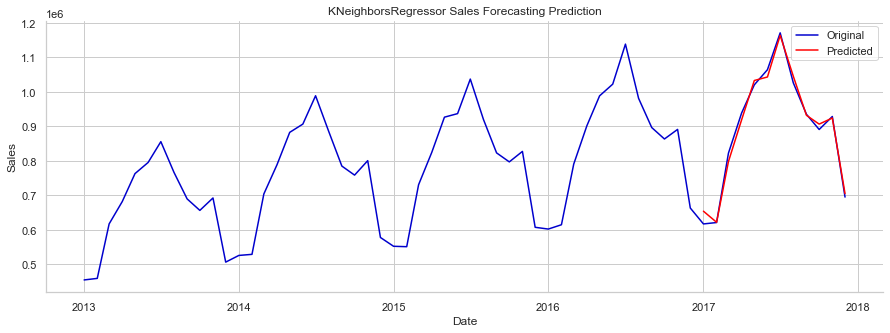

In [46]:
run_model(train, test, KNeighborsRegressor(n_neighbors=3), 'KNeighborsRegressor')

In [47]:
#store the model results for each model data frame for final comparison
rmse1 = list({model_scores['KNeighborsRegressor'][0]})
mae1 = list({model_scores['KNeighborsRegressor'][1]})
mse1 = list({model_scores['KNeighborsRegressor'][2]})
r21 = list({model_scores['KNeighborsRegressor'][3]})
results_temp = pd.DataFrame({'Method':['KNeighborsRegressor'],'RMSE':rmse1,
                            'MAE':mae1,'MSE':mse1,'MSE':mse1,
                            'R_square':r21},index={'8'})
results = pd.concat([results,results_temp])
results = results[['Method','RMSE','MAE','MSE','R_square']]

results

Method          RMSE           MAE           MSE  \
1                      ARIMA  14959.835978  11265.441970  2.237967e+08   
2          Linear Regression  16221.040791  12433.000000  2.631222e+08   
3              Random Forest  20443.599265  17072.916667  4.179408e+08   
4      DecisionTreeRegressor  20459.483665  17195.000000  4.185905e+08   
5  GradientBoostingRegressor  13798.242382  11655.333333  1.903915e+08   
6          AdaBoostRegressor  16290.581313  14259.833333  2.653830e+08   
7                    XGBoost  15701.003360  13342.666667  2.465215e+08   
8        KNeighborsRegressor  17675.478136  14580.000000  3.124225e+08   

   R_square  
1  0.983564  
2  0.990716  
3  0.985253  
4  0.985230  
5  0.993282  
6  0.990636  
7  0.991301  
8  0.988976

######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#70c335">Support Vector Regressor (SVR)

RMSE: 18781.218768138202
MAE: 14618.916666666666
MSE: 352734178.4166667
R2 Score: 0.9875535781730366


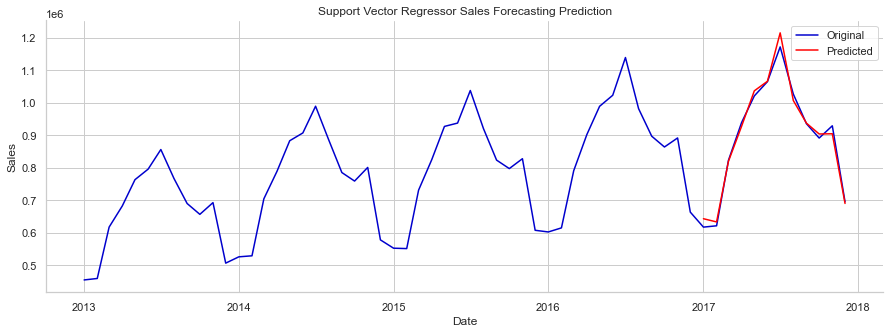

In [48]:
run_model(train, test, SVR(kernel='linear'), 'Support Vector Regressor')

In [49]:
#store the model results for each model data frame for final comparison
rmse1 = list({model_scores['Support Vector Regressor'][0]})
mae1 = list({model_scores['Support Vector Regressor'][1]})
mse1 = list({model_scores['Support Vector Regressor'][2]})
r21 = list({model_scores['Support Vector Regressor'][3]})
results_temp = pd.DataFrame({'Method':['Support Vector Regressor'],'RMSE':rmse1,
                            'MAE':mae1,'MSE':mse1,'MSE':mse1,
                            'R_square':r21},index={'9'})
results = pd.concat([results,results_temp])
results = results[['Method','RMSE','MAE','MSE','R_square']]

results

Method          RMSE           MAE           MSE  \
1                      ARIMA  14959.835978  11265.441970  2.237967e+08   
2          Linear Regression  16221.040791  12433.000000  2.631222e+08   
3              Random Forest  20443.599265  17072.916667  4.179408e+08   
4      DecisionTreeRegressor  20459.483665  17195.000000  4.185905e+08   
5  GradientBoostingRegressor  13798.242382  11655.333333  1.903915e+08   
6          AdaBoostRegressor  16290.581313  14259.833333  2.653830e+08   
7                    XGBoost  15701.003360  13342.666667  2.465215e+08   
8        KNeighborsRegressor  17675.478136  14580.000000  3.124225e+08   
9   Support Vector Regressor  18781.218768  14618.916667  3.527342e+08   

   R_square  
1  0.983564  
2  0.990716  
3  0.985253  
4  0.985230  
5  0.993282  
6  0.990636  
7  0.991301  
8  0.988976  
9  0.987554

######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#64c335">Long Short Term Memory Model (LSTM)

In [50]:
def lstm_model(train_data, test_data):
    
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
   
    model = Sequential()
    model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), 
                   stateful=True))
    model.add(Dense(1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, 
              shuffle=False)
    predictions = model.predict(X_test,batch_size=1)
    
    original_df = load_original_df()
    unscaled = undo_scaling(predictions, X_test, scaler_object, lstm=True)
    unscaled_df = predict_df(unscaled, original_df)
    
    get_scores(unscaled_df, original_df, 'LSTM')
    
    plot_results(unscaled_df, original_df, 'LSTM')

Epoch 1/200
35/35 [==============================] - 1s 842us/step - loss: 0.2790
Epoch 2/200
35/35 [==============================] - 0s 943us/step - loss: 0.2694
Epoch 3/200
35/35 [==============================] - 0s 900us/step - loss: 0.2577
Epoch 4/200
35/35 [==============================] - 0s 913us/step - loss: 0.2470
Epoch 5/200
35/35 [==============================] - 0s 878us/step - loss: 0.2366
Epoch 6/200
35/35 [==============================] - 0s 1ms/step - loss: 0.2261
Epoch 7/200
35/35 [==============================] - 0s 937us/step - loss: 0.2151
Epoch 8/200
35/35 [==============================] - 0s 917us/step - loss: 0.2037
Epoch 9/200
35/35 [==============================] - 0s 991us/step - loss: 0.1917
Epoch 10/200
35/35 [==============================] - 0s 936us/step - loss: 0.1793
Epoch 11/200
35/35 [==============================] - 0s 912us/step - loss: 0.1666
Epoch 12/200
35/35 [==============================] - 0s 892us/step - loss: 0.1536
Epoch 13/200
35

35/35 [==============================] - 0s 962us/step - loss: 0.0029
Epoch 101/200
35/35 [==============================] - 0s 933us/step - loss: 0.0028
Epoch 102/200
35/35 [==============================] - 0s 900us/step - loss: 0.0028
Epoch 103/200
35/35 [==============================] - 0s 970us/step - loss: 0.0028
Epoch 104/200
35/35 [==============================] - 0s 962us/step - loss: 0.0027
Epoch 105/200
35/35 [==============================] - 0s 939us/step - loss: 0.0027
Epoch 106/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 107/200
35/35 [==============================] - 0s 940us/step - loss: 0.0027
Epoch 108/200
35/35 [==============================] - 0s 997us/step - loss: 0.0026
Epoch 109/200
35/35 [==============================] - 0s 940us/step - loss: 0.0026
Epoch 110/200
35/35 [==============================] - 0s 967us/step - loss: 0.0026
Epoch 111/200
35/35 [==============================] - 0s 901us/step - loss: 0.0026
Epoch 11

35/35 [==============================] - 0s 909us/step - loss: 0.0015
Epoch 198/200
35/35 [==============================] - 0s 882us/step - loss: 0.0015
Epoch 199/200
35/35 [==============================] - 0s 941us/step - loss: 0.0015
Epoch 200/200
35/35 [==============================] - 0s 988us/step - loss: 0.0015
RMSE: 14898.670930656868
MAE: 11001.166666666666
MSE: 221970395.5
R2 Score: 0.9921676510399641


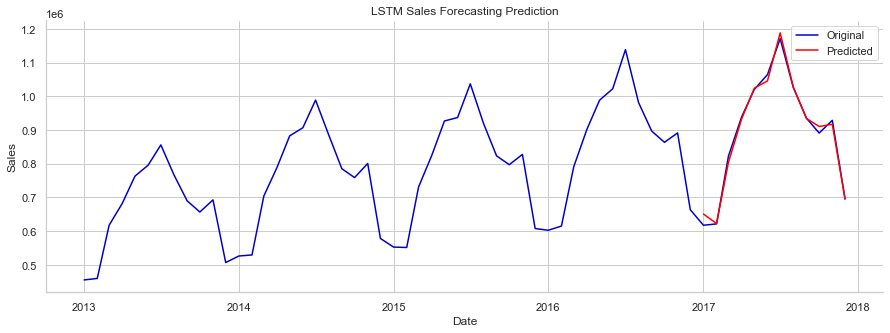

In [51]:
lstm_model(train, test)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.-em;color:#35c337">Metrics for all models

In [52]:
#store the model results for each model data frame for final comparison
rmse1 = list({model_scores['LSTM'][0]})
mae1 = list({model_scores['LSTM'][1]})
mse1 = list({model_scores['LSTM'][2]})
r21 = list({model_scores['LSTM'][3]})
results_temp = pd.DataFrame({'Method':['LSTM'],'RMSE':rmse1,
                            'MAE':mae1,'MSE':mse1,'MSE':mse1,
                            'R_square':r21},index={'10'})
results = pd.concat([results,results_temp])
results = results[['Method','RMSE','MAE','MSE','R_square']]

results

Method          RMSE           MAE           MSE  \
1                       ARIMA  14959.835978  11265.441970  2.237967e+08   
2           Linear Regression  16221.040791  12433.000000  2.631222e+08   
3               Random Forest  20443.599265  17072.916667  4.179408e+08   
4       DecisionTreeRegressor  20459.483665  17195.000000  4.185905e+08   
5   GradientBoostingRegressor  13798.242382  11655.333333  1.903915e+08   
6           AdaBoostRegressor  16290.581313  14259.833333  2.653830e+08   
7                     XGBoost  15701.003360  13342.666667  2.465215e+08   
8         KNeighborsRegressor  17675.478136  14580.000000  3.124225e+08   
9    Support Vector Regressor  18781.218768  14618.916667  3.527342e+08   
10                       LSTM  14898.670931  11001.166667  2.219704e+08   

    R_square  
1   0.983564  
2   0.990716  
3   0.985253  
4   0.985230  
5   0.993282  
6   0.990636  
7   0.991301  
8   0.988976  
9   0.987554  
10  0.992168